## Connect Colab to Drive to access the dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Libraries

In [2]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
import keras
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DataSet

## 2.0 Open Folders

In [3]:
Insect_Allergy = '/content/drive/MyDrive/Graduation Project DataSet/أمراض الجلدية/Insect Allergy'
Bacterial_infection = '/content/drive/MyDrive/Graduation Project DataSet/أمراض الجلدية/Bacterial infection'

## 2.3 Label each Class

In [4]:

folders = {
    # 'key', 'value'
    Insect_Allergy: 0,
    Bacterial_infection: 1
}

for key, value in folders.items():
    print(f'The Label of Class {key.split()[-1]} is: {value}')

The Label of Class Allergy is: 0
The Label of Class infection is: 1


## 2.4 Reading Images



In [5]:
import cv2
import random


folders_paths = [Insect_Allergy, Bacterial_infection]
SIZE = 200

Data = []
Label = []

for folder in folders_paths:
    x = 0
    for image in os.listdir(folder):
        x +=1
        image = cv2.imread(os.path.join(folder, image))
        image_array = cv2.resize(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), (SIZE, SIZE))  # BGR2RGB
        Data.append(image_array)
        Label.append(folders[folder])
        
        if x == 100:
            break

# 2.5 Visualize some imaegs

In [27]:
folders_name = {
        # 'Key' : value 
        'Insect_Allergy': 0,
        'Bacterial_infection': 1  
    }

def get_folder_name(x):
    # function to return class name
    for key, value in folders_name.items():
        if x == value:
            return key


plt.figure(figsize=(24,24))
for n , i in enumerate(list(np.random.randint(0,len(Data),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(Data[i])   
    plt.axis('off')
    plt.title(get_folder_name(Label[i]))

Output hidden; open in https://colab.research.google.com to view.

## 2.4 Check Number of images

In [6]:
print(f'The total Number of images is: {len(Data)} image')
print(f'The total Number of labels is: {len(Label)} Label')
print(Data[0].shape)

The total Number of images is: 200 image
The total Number of labels is: 200 Label
(200, 200, 3)


## 2.7 Convert Data to Array

In [7]:
Data = np.array(Data)
Label = np.array(Label)

print(f'Data shape is {Data.shape}')
print(f'Label shape  is {Label.shape}')

Data shape is (200, 200, 200, 3)
Label shape  is (200,)


## 2.8 Train and Test Split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data, Label, test_size=0.3, shuffle=True)

In [11]:
print(f'X_train shape is {X_train.shape}')
print(f'X_test shape is {X_test.shape}')
print(f'y_train shape is {y_train.shape}')
print(f'y_test shape is {y_test.shape}')

X_train shape is (140, 200, 200, 3)
X_test shape is (60, 200, 200, 3)
y_train shape is (140,)
y_test shape is (60,)


## 2.9 Normalization

In [ ]:
# Normalization
X_train_Norm = X_train / 255.0
X_test_Norm = X_test / 255.0

# Transfer Learning
# GoogleNet


In [12]:
from keras.applications import inception_v3

conv_base = inception_v3.InceptionV3(weights='imagenet', include_top=False,
                                     input_shape=(200, 200, 3))

87910968/87910968 [==============================] - 3s 0us/step


In [ ]:
conv_base.summary()

In [14]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 4, 4, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 30,191,905
Trainable params: 30,157,473
Non-trainable params: 34,432
_________________________________________________________________


In [16]:
print('This is the number of trainable weights ' 'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 192


In [17]:
conv_base.trainable = False

In [18]:
print('This is the number of trainable weights ' 'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 4, 4, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 30,191,905
Trainable params: 8,389,121
Non-trainable params: 21,802,784
_________________________________________________________________


In [20]:
optimizer = keras
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [21]:
%%time
history = model.fit(X_train, y_train, batch_size = 32, epochs = 30, validation_data = (X_test, y_test))

Epoch 1/30
5/5 [==============================] - 19s 895ms/step - loss: 432.8684 - accuracy: 0.5214 - val_loss: 317.6126 - val_accuracy: 0.5167
Epoch 2/30
5/5 [==============================] - 0s 76ms/step - loss: 169.1673 - accuracy: 0.5286 - val_loss: 88.2231 - val_accuracy: 0.4833
Epoch 3/30
5/5 [==============================] - 0s 77ms/step - loss: 94.3881 - accuracy: 0.5071 - val_loss: 73.8045 - val_accuracy: 0.4667
Epoch 4/30
5/5 [==============================] - 0s 90ms/step - loss: 48.3127 - accuracy: 0.4000 - val_loss: 53.5183 - val_accuracy: 0.5167
Epoch 5/30
5/5 [==============================] - 0s 90ms/step - loss: 25.5581 - accuracy: 0.5143 - val_loss: 23.2591 - val_accuracy: 0.4667
Epoch 6/30
5/5 [==============================] - 0s 77ms/step - loss: 14.2156 - accuracy: 0.5786 - val_loss: 6.8961 - val_accuracy: 0.6500
Epoch 7/30
5/5 [==============================] - 0s 90ms/step - loss: 8.0071 - accuracy: 0.6214 - val_loss: 7.4942 - val_accuracy: 0.6000
Epoch 8/30


In [22]:
print(model.evaluate(X_test, y_test))

2/2 [==============================] - 0s 86ms/step - loss: 3.6072 - accuracy: 0.6667
[3.6071650981903076, 0.6666666865348816]


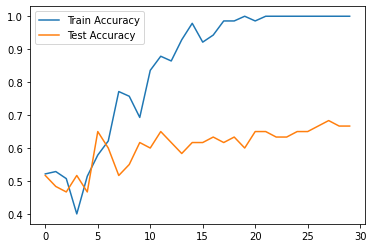

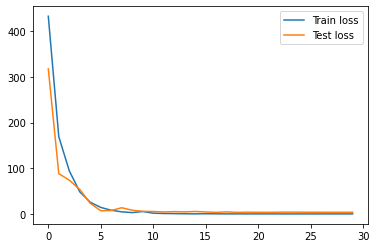

In [23]:
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Test Accuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label = 'Train loss')
plt.plot(history.history['val_loss'], label = 'Test loss')
plt.legend()
plt.show()

In [ ]:
folders_name = {
        # 'Key' : value 
        'Insect_Allergy': 0,
        'Bacterial_infection': 1  
    }

def get_folder_name(x):
    # function to return class name
    for key, value in folders_name.items():
        if x == value:
            return key

y_pred = model.predict(X_test)

plt.figure(figsize=(24,24))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])   
    plt.axis('off')
    plt.title(get_folder_name(np.argmax(y_pred[i])))

In [31]:
y_pred = model.predict(X_test)

y_predict = []
for i in range(len(y_pred)):
    y_predict.append(np.argmax(y_pred[i]))
    


2/2 [==============================] - 0s 86ms/step


In [33]:
len(y_predict)
print(y_predict)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


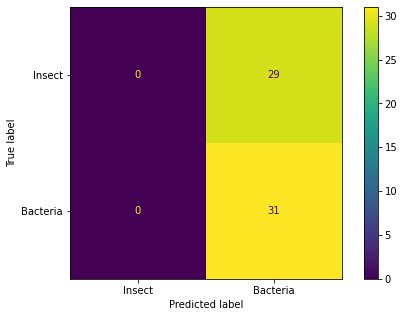

In [34]:
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

def custom_confusion_matrix(y_true, y_pred, display_labels=None):
    """
    A function to plot a custom confusion matrix with
    positive class as the first row and the first column.
    """
    # Create a flipped matrix
    cm = np.flip(metrics.confusion_matrix(y_test, y_predict))
    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 5))
    cmp = ConfusionMatrixDisplay(cm, display_labels=display_labels)
    cmp.plot(ax=ax)

custom_confusion_matrix(
  y_test, y_pred, 
  display_labels=["Insect", "Bacteria"]
)